In [3]:
import pandas as pd

df = pd.read_csv("HousingData.csv")
df.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [6]:
X = df.drop("MEDV", axis=1)
y = df["MEDV"]

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [8]:
X_train.shape, X_test.shape

((404, 13), (102, 13))

In [10]:
df.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [11]:
df = df.fillna(df.mean())

In [12]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [13]:
X = df.drop("MEDV", axis=1)
y = df["MEDV"]

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [15]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [16]:
y_pred = model.predict(X_test)

In [17]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R2 Score:", r2)

Mean Squared Error: 25.01767202384268
R2 Score: 0.6588520195508143


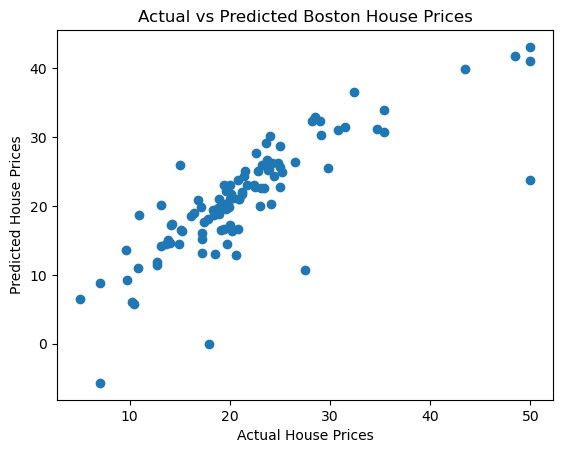

In [18]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel("Actual House Prices")
plt.ylabel("Predicted House Prices")
plt.title("Actual vs Predicted Boston House Prices")
plt.show()

In [19]:
import pandas as pd

feature_importance = pd.Series(
    model.coef_, index=X.columns
).sort_values(ascending=False)

feature_importance

RM          4.752410
CHAS        3.240673
RAD         0.222823
ZN          0.029016
B           0.012263
TAX        -0.009151
AGE        -0.019520
INDUS      -0.027133
CRIM       -0.114140
LSTAT      -0.438440
PTRATIO    -0.886045
DIS        -1.521593
NOX       -16.017543
dtype: float64

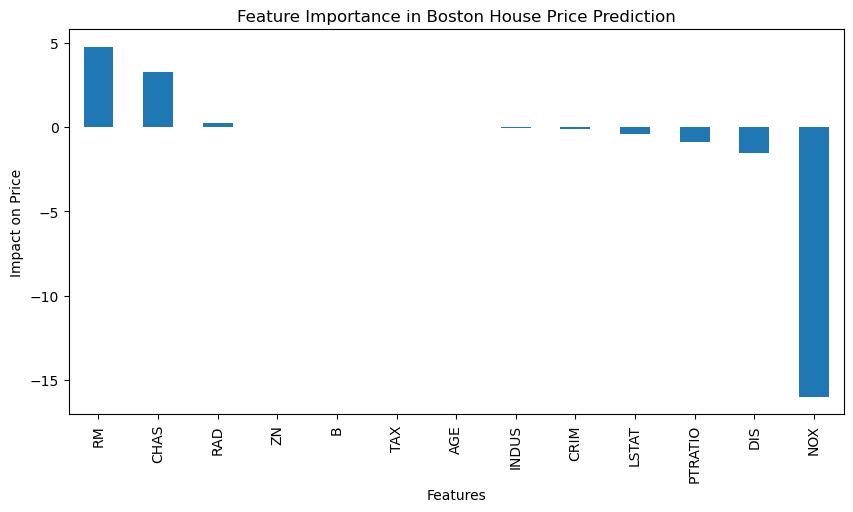

In [20]:
import matplotlib.pyplot as plt

feature_importance.plot(kind='bar', figsize=(10,5))
plt.title("Feature Importance in Boston House Price Prediction")
plt.ylabel("Impact on Price")
plt.xlabel("Features")
plt.show()

## Feature Importance Interpretation

From the feature importance plot:

- **RM (Average number of rooms)** has a strong positive impact on house prices.
- **LSTAT (Lower status population)** negatively affects house prices.
- **NOX (Air pollution)** shows a strong negative impact.
- **PTRATIO (Pupil-teacher ratio)** negatively impacts house value.

This shows that better living conditions and infrastructure increase house prices,
while pollution and socio-economic stress decrease them.

## Conclusion

In this project, a Linear Regression model was developed to predict Boston house prices
using multiple socio-economic and environmental features.

The model achieved a reasonable performance with an R² score of around 0.66,
indicating that the model explains a significant portion of the variance in house prices.

Key factors such as number of rooms, air pollution, and socio-economic conditions
were found to have a strong influence on housing prices.

This project demonstrates the complete machine learning workflow,
including data preprocessing, model training, evaluation, and interpretation.

## Future Improvements

- Handle missing values using advanced imputation techniques.
- Try other regression models such as Random Forest or Gradient Boosting.
- Perform feature scaling and hyperparameter tuning.
- Add cross-validation to improve model robustness.
- Deploy the model as a simple web application.

# Boston House Price Prediction Project – Completed